In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pylab

os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'
import numpy as np

os.chdir("/home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/")
from model import model
from raw_to_tfrecoder import slide

model_dir = "/home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/log/model/model.cpk-89000"


/home/wxming/PycharmProject/environ/All/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1 的tfrecoder文件以存在
INFO:tensorflow:Restoring parameters from /home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/log/model/model.cpk-89000


----------------------------------------- 1.jpg -----------------------------------------
h [6] w [8]


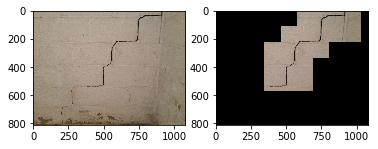

2 的tfrecoder文件以存在
INFO:tensorflow:Restoring parameters from /home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/log/model/model.cpk-89000


----------------------------------------- 2.jpg -----------------------------------------
h [4] w [7]


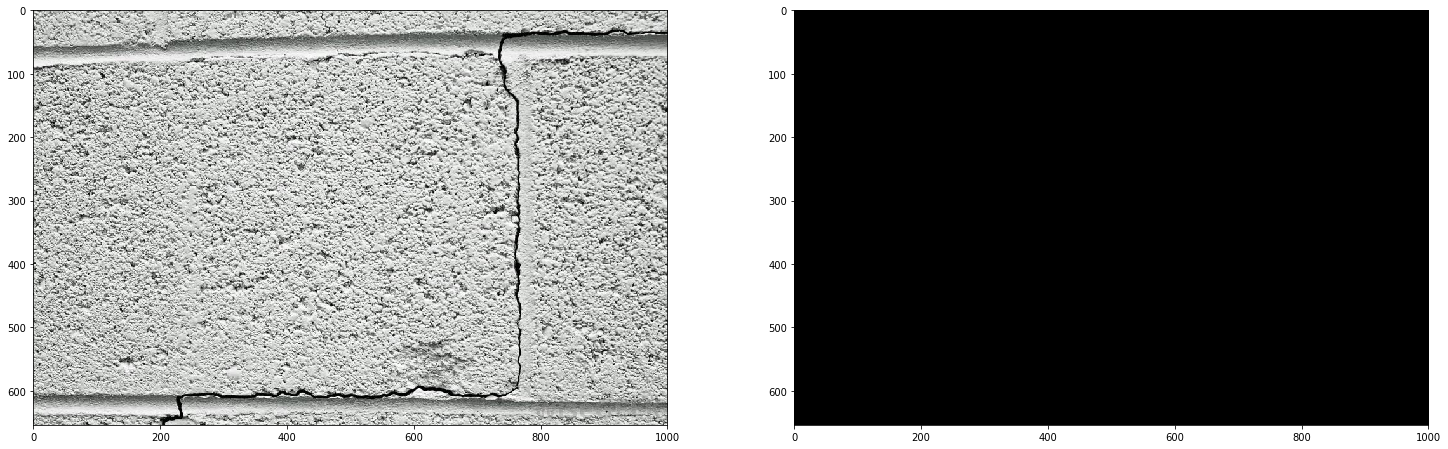

3 的tfrecoder文件以存在
INFO:tensorflow:Restoring parameters from /home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/log/model/model.cpk-89000


----------------------------------------- 3.jpg -----------------------------------------
h [6] w [8]


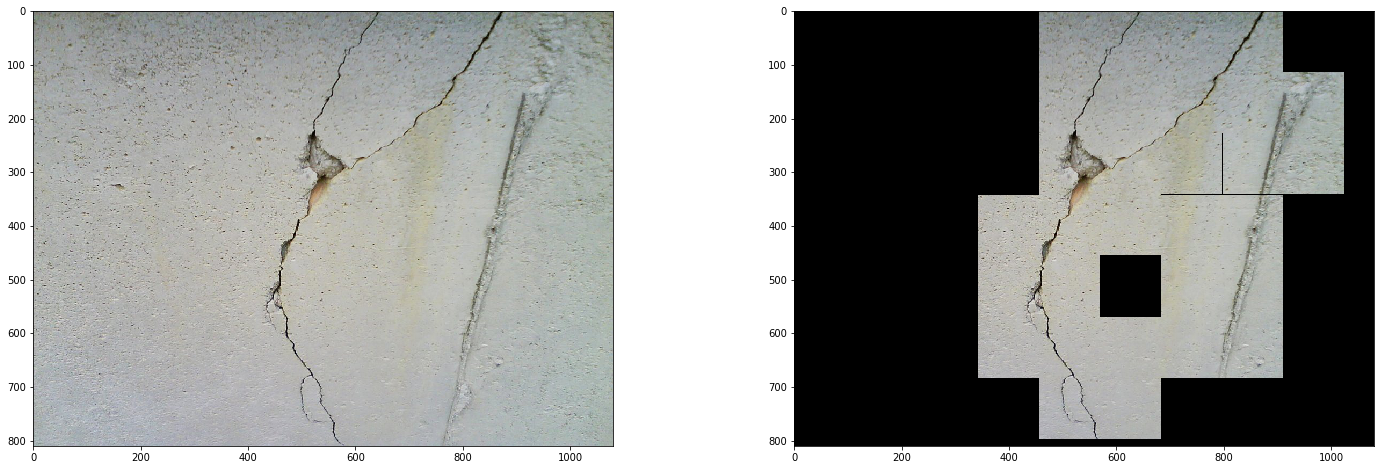

4 的tfrecoder文件以存在
INFO:tensorflow:Restoring parameters from /home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/log/model/model.cpk-89000


----------------------------------------- 4.jpg -----------------------------------------
h [5] w [12]


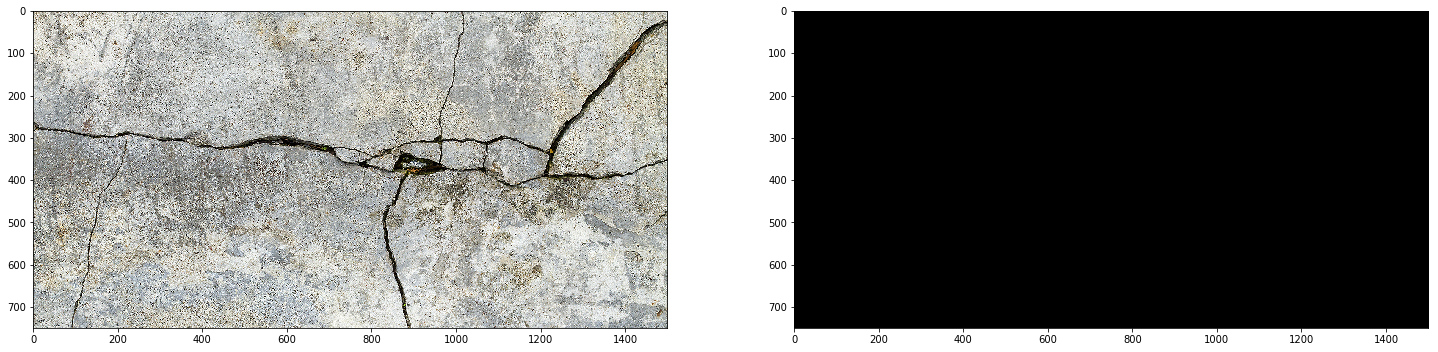

5 的tfrecoder文件以存在
INFO:tensorflow:Restoring parameters from /home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/log/model/model.cpk-89000


----------------------------------------- 5.jpg -----------------------------------------
h [19] w [29]


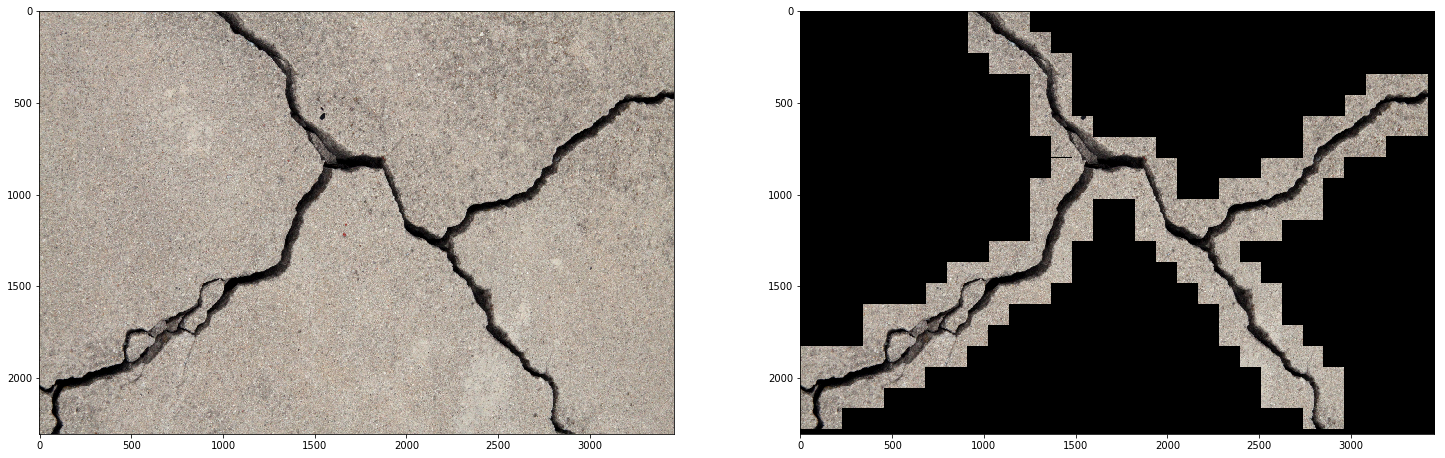

6 的tfrecoder文件以存在
INFO:tensorflow:Restoring parameters from /home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/log/model/model.cpk-89000


----------------------------------------- 6.jpg -----------------------------------------
h [16] w [25]


7 的tfrecoder文件以存在
INFO:tensorflow:Restoring parameters from /home/wxming/PycharmProject/Notebook/Concrete-Crack-Detection/log/model/model.cpk-89000


IndexError: too many indices for array

In [2]:
name_list = [
    "/home/wxming/PycharmProject/Data/Concrete_data/1.jpg",
    "/home/wxming/PycharmProject/Data/Concrete_data/2.jpg",
    "/home/wxming/PycharmProject/Data/Concrete_data/3.jpg",
    "/home/wxming/PycharmProject/Data/Concrete_data/4.jpg",
    "/home/wxming/PycharmProject/Data/Concrete_data/5.jpg",
    "/home/wxming/PycharmProject/Data/Concrete_data/6.jpg",
    "/home/wxming/PycharmProject/Data/Concrete_data/7.jpg",
    "/home/wxming/PycharmProject/Data/Concrete_data/8.jpg",
    "/home/wxming/PycharmProject/Data/Concrete_data/9.jpg"
]
with tf.Session() as sess:
    for im in name_list:
        test_image = slide(im, 114)
        x, iterator_initializer = test_image.break_image()
        image = []
        prey = model(x['image'], 1.0)
        preys = tf.argmax(prey, 1)
        restore = tf.train.Saver()
        restore.restore(sess, model_dir)
        sess.run(iterator_initializer)
        # y, h, w = sess.run([prey, x['h'], x['w']])

        while True:
            try:
                y, h, w = sess.run([preys, x['h'], x['w']])
                image.extend(y)
            except:
                break
        a = np.array(image).reshape([h[0], w[0]])
        re_image, raw_image = test_image.marge_image(a)
        pylab.rcParams['figure.figsize'] = (25.0, 8.0)
        ax = plt.figure()
        print("-----------------------------------------", im.split("/")[-1],
              "-----------------------------------------")
        print("h", h, "w", w)

        ax.add_subplot(1, 2, 1).imshow(raw_image)
        ax.add_subplot(1, 2, 2).imshow(re_image)

        plt.show()
sess.close()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from PIL import Image
img_ori = np.array(Image.open('5.png'))
img_tran = np.load('img_tran.npy')
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_ori)
plt.subplot(1, 2, 2)
i = [i for i in range(200) if i % 5 == 0]
def update(i):
    return plt.imshow(img_tran[i].reshape([28, 28]))
ani = animation.FuncAnimation(fig, update)
# ani.save('contrast.mp4', fps=15,
#                  extra_args=['-vcodec', 'libx264'],
#                  writer='ffmpeg_file')
ani.save('contrast.gif', writer='imagemagick', fps=30)
# plt.show()

In [1]:
for a, b in zip(range(9), range(9)):
    print(a, b)


0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8


In [2]:

import matplotlib.pyplot as plt

import numpy as np

from matplotlib import animation

 

fig, ax = plt.subplots()

 

x = np.arange(0, 2 * np.pi, 0.01)

line, = ax.plot(x, np.sin(x))

 

 

def animate(i):

    line.set_ydata(np.sin(x + i / 100))

    return line,

 

 

def init():

    line.set_ydata(np.sin(x))

    return line,

 

 

ani = animation.FuncAnimation(fig=fig, func=animate, frames=100,

                              init_func=init, interval=20, blit=False)

 

plt.show()


<Figure size 640x480 with 1 Axes>

In [8]:
def a():
    for i in range(10):
        yield i


In [14]:
for i in a():
    print(i)

0
1
2
3
4
5
6
7
8
9


AttributeError: 'generator' object has no attribute 'next'